In [12]:
import pandas as pd
import numpy as np

In [10]:
data=pd.read_csv("C:\\Users\\sooje\\Downloads\\database_08.csv",index_col=0,names=(["s1","s2","s3","s4","s5"]))
data

,s1,s2,s3,s4,s5
1,back pain,headache,insomnia,NaN,NaN
2,back pain,headache,insomnia,NaN,NaN
3,fever,nausea,NaN,NaN,NaN
4,insomnia,nausea,NaN,NaN,NaN
5,back pain,fatigue,headache,insomnia,nausea
6,back pain,fatigue,headache,insomnia,NaN
7,back pain,fatigue,headache,insomnia,nausea
8,back pain,fatigue,headache,insomnia,nausea
9,back pain,fatigue,headache,insomnia,NaN
10,back pain,fatigue,headache,insomnia,nausea


In [36]:
item_base=list(set(np.concatenate(data.values)))
item_base.pop(0)
print("Item_base:",item_base)

Item_base: ['fever', 'back pain', 'insomnia', 'fatigue', 'headache', 'nausea']


In [129]:
from itertools import combinations

output = sum([list(map(list, combinations(item_base, i))) for i in range(len(item_base) + 1)], [])
output.pop(0)
len(output)

63

In [207]:
dic_count={}
for j in output:
    count=0
    for i in range(1,len(data)+1):
        d=data.loc[i]
        if(set(j).issubset(set(d))):
            count=count+1 
    dic_count.update({str(j):count})
dic_count

{"['fever']": 9,
 "['back pain']": 26,
 "['insomnia']": 22,
 "['fatigue']": 19,
 "['headache']": 25,
 "['nausea']": 15,
 "['fever', 'back pain']": 7,
 "['fever', 'insomnia']": 1,
 "['fever', 'fatigue']": 3,
 "['fever', 'headache']": 6,
 "['fever', 'nausea']": 7,
 "['back pain', 'insomnia']": 20,
 "['back pain', 'fatigue']": 19,
 "['back pain', 'headache']": 25,
 "['back pain', 'nausea']": 11,
 "['insomnia', 'fatigue']": 17,
 "['insomnia', 'headache']": 19,
 "['insomnia', 'nausea']": 9,
 "['fatigue', 'headache']": 18,
 "['fatigue', 'nausea']": 8,
 "['headache', 'nausea']": 10,
 "['fever', 'back pain', 'insomnia']": 1,
 "['fever', 'back pain', 'fatigue']": 3,
 "['fever', 'back pain', 'headache']": 6,
 "['fever', 'back pain', 'nausea']": 5,
 "['fever', 'insomnia', 'fatigue']": 1,
 "['fever', 'insomnia', 'headache']": 0,
 "['fever', 'insomnia', 'nausea']": 1,
 "['fever', 'fatigue', 'headache']": 2,
 "['fever', 'fatigue', 'nausea']": 2,
 "['fever', 'headache', 'nausea']": 4,
 "['back pain',

In [527]:
dict_str={}

for i in output:
    key=len(i)
    v=str(i)
    #print(key,v)
    if key not in dict_str:
            dict_str[key] = []
            dict_str[key].append(v)
    else:
        dict_str[key].append(v)

In [528]:
dict_str

{1: ["['fever']",
  "['back pain']",
  "['insomnia']",
  "['fatigue']",
  "['headache']",
  "['nausea']"],
 2: ["['fever', 'back pain']",
  "['fever', 'insomnia']",
  "['fever', 'fatigue']",
  "['fever', 'headache']",
  "['fever', 'nausea']",
  "['back pain', 'insomnia']",
  "['back pain', 'fatigue']",
  "['back pain', 'headache']",
  "['back pain', 'nausea']",
  "['insomnia', 'fatigue']",
  "['insomnia', 'headache']",
  "['insomnia', 'nausea']",
  "['fatigue', 'headache']",
  "['fatigue', 'nausea']",
  "['headache', 'nausea']",
  "['insomnia', 'headache']",
  "['insomnia', 'nausea']",
  "['fatigue', 'headache']",
  "['headache', 'nausea']"],
 3: ["['fever', 'back pain', 'insomnia']",
  "['fever', 'back pain', 'fatigue']",
  "['fever', 'back pain', 'headache']",
  "['fever', 'back pain', 'nausea']",
  "['fever', 'insomnia', 'fatigue']",
  "['fever', 'fatigue', 'nausea']",
  "['fever', 'headache', 'nausea']",
  "['back pain', 'insomnia', 'fatigue']",
  "['back pain', 'insomnia', 'headac

In [529]:
dict={}

for i in output:
    key=len(i)
    if key not in dict:
            dict[key] = []
            dict[key].append(i)
    else:
        dict[key].append(i)
        
ed=[]

for i in range(1,6):
    for j in dict[i]:
        for k in dict[i+1]:
            if(set(j).issubset(set(k))):
                ed.append((str(j),str(k)))

# for j in dict[1]:
#     ed.append((str(dict[0]),str(j)))

dict

{1: [['fever'],
  ['back pain'],
  ['insomnia'],
  ['fatigue'],
  ['headache'],
  ['nausea']],
 2: [['fever', 'back pain'],
  ['fever', 'insomnia'],
  ['fever', 'fatigue'],
  ['fever', 'headache'],
  ['fever', 'nausea'],
  ['back pain', 'insomnia'],
  ['back pain', 'fatigue'],
  ['back pain', 'headache'],
  ['back pain', 'nausea'],
  ['insomnia', 'fatigue'],
  ['insomnia', 'headache'],
  ['insomnia', 'nausea'],
  ['fatigue', 'headache'],
  ['fatigue', 'nausea'],
  ['headache', 'nausea'],
  ['insomnia', 'headache'],
  ['insomnia', 'nausea'],
  ['fatigue', 'headache'],
  ['headache', 'nausea']],
 3: [['fever', 'back pain', 'insomnia'],
  ['fever', 'back pain', 'fatigue'],
  ['fever', 'back pain', 'headache'],
  ['fever', 'back pain', 'nausea'],
  ['fever', 'insomnia', 'fatigue'],
  ['fever', 'fatigue', 'nausea'],
  ['fever', 'headache', 'nausea'],
  ['back pain', 'insomnia', 'fatigue'],
  ['back pain', 'insomnia', 'headache'],
  ['back pain', 'insomnia', 'nausea'],
  ['back pain', 'fatig

In [380]:
import networkx as nx

G = nx.Graph()

for j in output:
    G.add_node(str(j))
    
# G.add_node('a')
# for i in dict[1]:
#     ed.append(('a',str(i)))    

G.add_edges_from(ed)
G.remove_node('a')
G.nodes()

NodeView(("['fever']", "['back pain']", "['insomnia']", "['fatigue']", "['headache']", "['nausea']", "['fever', 'back pain']", "['fever', 'insomnia']", "['fever', 'fatigue']", "['fever', 'headache']", "['fever', 'nausea']", "['back pain', 'insomnia']", "['back pain', 'fatigue']", "['back pain', 'headache']", "['back pain', 'nausea']", "['insomnia', 'fatigue']", "['insomnia', 'headache']", "['insomnia', 'nausea']", "['fatigue', 'headache']", "['fatigue', 'nausea']", "['headache', 'nausea']", "['fever', 'back pain', 'insomnia']", "['fever', 'back pain', 'fatigue']", "['fever', 'back pain', 'headache']", "['fever', 'back pain', 'nausea']", "['fever', 'insomnia', 'fatigue']", "['fever', 'insomnia', 'headache']", "['fever', 'insomnia', 'nausea']", "['fever', 'fatigue', 'headache']", "['fever', 'fatigue', 'nausea']", "['fever', 'headache', 'nausea']", "['back pain', 'insomnia', 'fatigue']", "['back pain', 'insomnia', 'headache']", "['back pain', 'insomnia', 'nausea']", "['back pain', 'fatigu

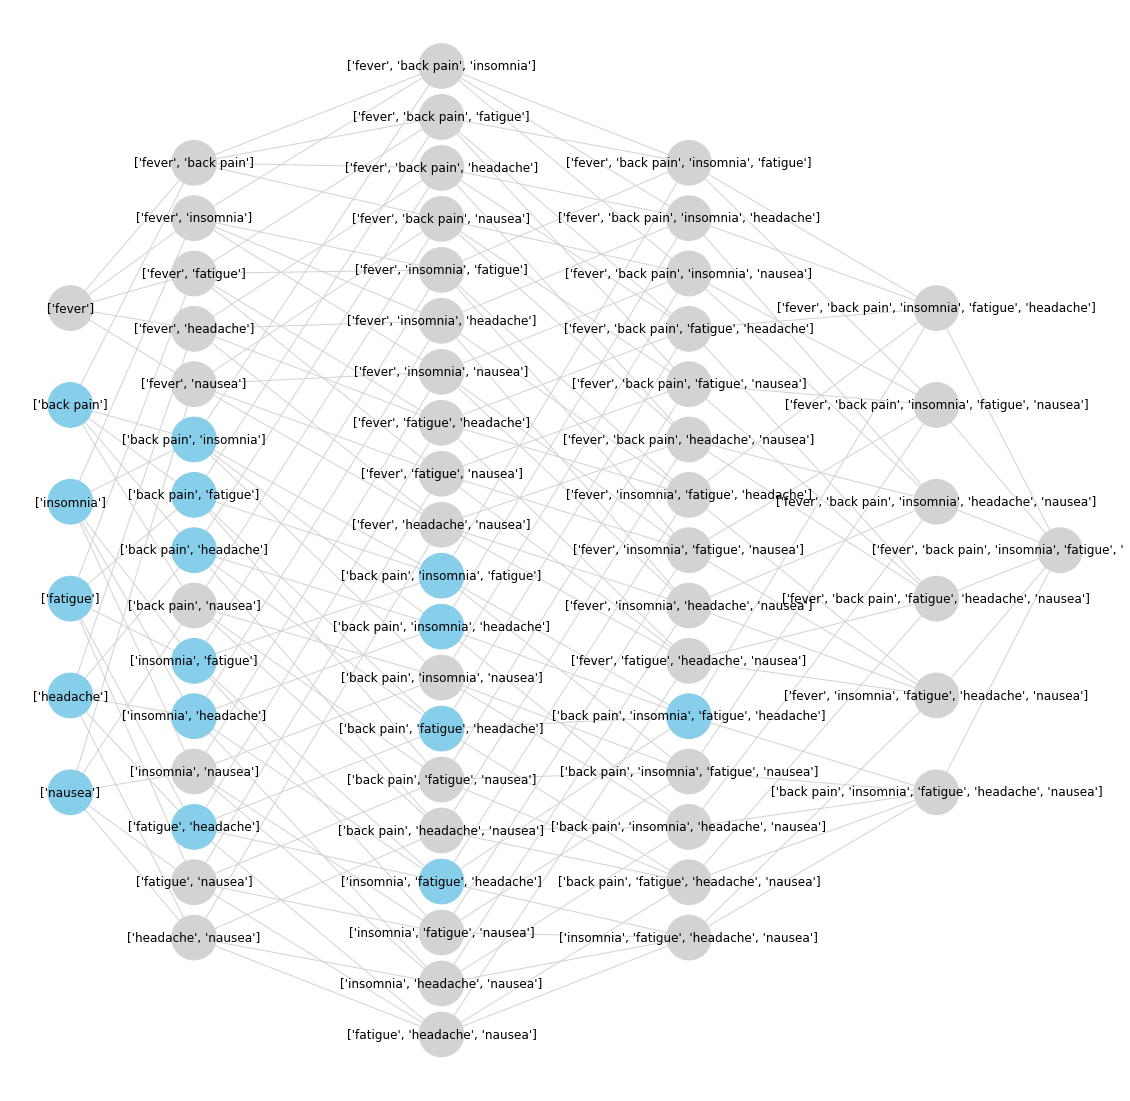

In [382]:
a1= a5=0.5
a2= a4=0.8
a3=1

s1=1/(len(dict[1])-1)
s2=1.6/(len(dict[2])-1)
s3=2/(len(dict[3])-1)
s4=1.6/(len(dict[4])-1)
s5=1/(len(dict[5])-1)
for node in G:
    if node in dict_str[1]:
        pos[node][0]=-0.8  #horizontal
        pos[node][1]=a1  #vertical
        a1=a1-s1
    elif node in dict_str[2]:
        pos[node][0]=-0.6  #horizontal
        pos[node][1]=a2  #vertical
        a2=a2-s2
    elif node in dict_str[3]:
        pos[node][0]=-0.2  #horizontal
        pos[node][1]=a3  #vertical
        a3=a3-s3
    elif node in dict_str[4]:
        pos[node][0]=0.2  #horizontal
        pos[node][1]=a4  #vertical
        a4=a4-s4
    elif node in dict_str[5]:
        pos[node][0]=0.6  #horizontal
        pos[node][1]=a5  #vertical  
        a5=a5-s5   
    else:
        pos[node][0]=0.8  #horizontal
        pos[node][1]=0  #vertical  

color_map=[]
for node in G:
    if dic_count[node] >= 15:
        color_map.append('skyblue')
    else:
        color_map.append('lightgrey')
        
plt.subplots(figsize=(20,20))
nx.draw(G, pos, with_labels=True,edge_color='lightgrey', node_size=2000, node_color=color_map)
plt.show()   


In [363]:
node2=[]
for node in G:
    if dic_count[node] >= 15:
        node2.append(node)

node2

["['back pain']",
 "['insomnia']",
 "['fatigue']",
 "['headache']",
 "['nausea']",
 "['back pain', 'insomnia']",
 "['back pain', 'fatigue']",
 "['back pain', 'headache']",
 "['insomnia', 'fatigue']",
 "['insomnia', 'headache']",
 "['fatigue', 'headache']",
 "['back pain', 'insomnia', 'fatigue']",
 "['back pain', 'insomnia', 'headache']",
 "['back pain', 'fatigue', 'headache']",
 "['insomnia', 'fatigue', 'headache']",
 "['back pain', 'insomnia', 'fatigue', 'headache']"]

In [371]:
ed2=[]

for i in range(1,6):
    for j in dict[i]:
        j2=str(j)
        if j2 in node2:
            for k in dict[i+1]:
                k2=str(k)
                if k2 in node2:
                    #print('yes',node2)
                    if(set(j).issubset(set(k))):
                        ed2.append((str(j),str(k)))

# for j in dict[1]:
#     ed.append((str(dict[0]),str(j)))

ed2

[("['back pain']", "['back pain', 'insomnia']"),
 ("['back pain']", "['back pain', 'fatigue']"),
 ("['back pain']", "['back pain', 'headache']"),
 ("['insomnia']", "['back pain', 'insomnia']"),
 ("['insomnia']", "['insomnia', 'fatigue']"),
 ("['insomnia']", "['insomnia', 'headache']"),
 ("['fatigue']", "['back pain', 'fatigue']"),
 ("['fatigue']", "['insomnia', 'fatigue']"),
 ("['fatigue']", "['fatigue', 'headache']"),
 ("['headache']", "['back pain', 'headache']"),
 ("['headache']", "['insomnia', 'headache']"),
 ("['headache']", "['fatigue', 'headache']"),
 ("['back pain', 'insomnia']", "['back pain', 'insomnia', 'fatigue']"),
 ("['back pain', 'insomnia']", "['back pain', 'insomnia', 'headache']"),
 ("['back pain', 'fatigue']", "['back pain', 'insomnia', 'fatigue']"),
 ("['back pain', 'fatigue']", "['back pain', 'fatigue', 'headache']"),
 ("['back pain', 'headache']", "['back pain', 'insomnia', 'headache']"),
 ("['back pain', 'headache']", "['back pain', 'fatigue', 'headache']"),
 ("[

In [373]:
import networkx as nx

G2 = nx.Graph()

for j in node2:
    G2.add_node(j)
    
# G.add_node('a')
# for i in dict[1]:
#     ed.append(('a',str(i)))    

G2.add_edges_from(ed2)
G2.nodes()

NodeView(("['back pain']", "['insomnia']", "['fatigue']", "['headache']", "['nausea']", "['back pain', 'insomnia']", "['back pain', 'fatigue']", "['back pain', 'headache']", "['insomnia', 'fatigue']", "['insomnia', 'headache']", "['fatigue', 'headache']", "['back pain', 'insomnia', 'fatigue']", "['back pain', 'insomnia', 'headache']", "['back pain', 'fatigue', 'headache']", "['insomnia', 'fatigue', 'headache']", "['back pain', 'insomnia', 'fatigue', 'headache']"))

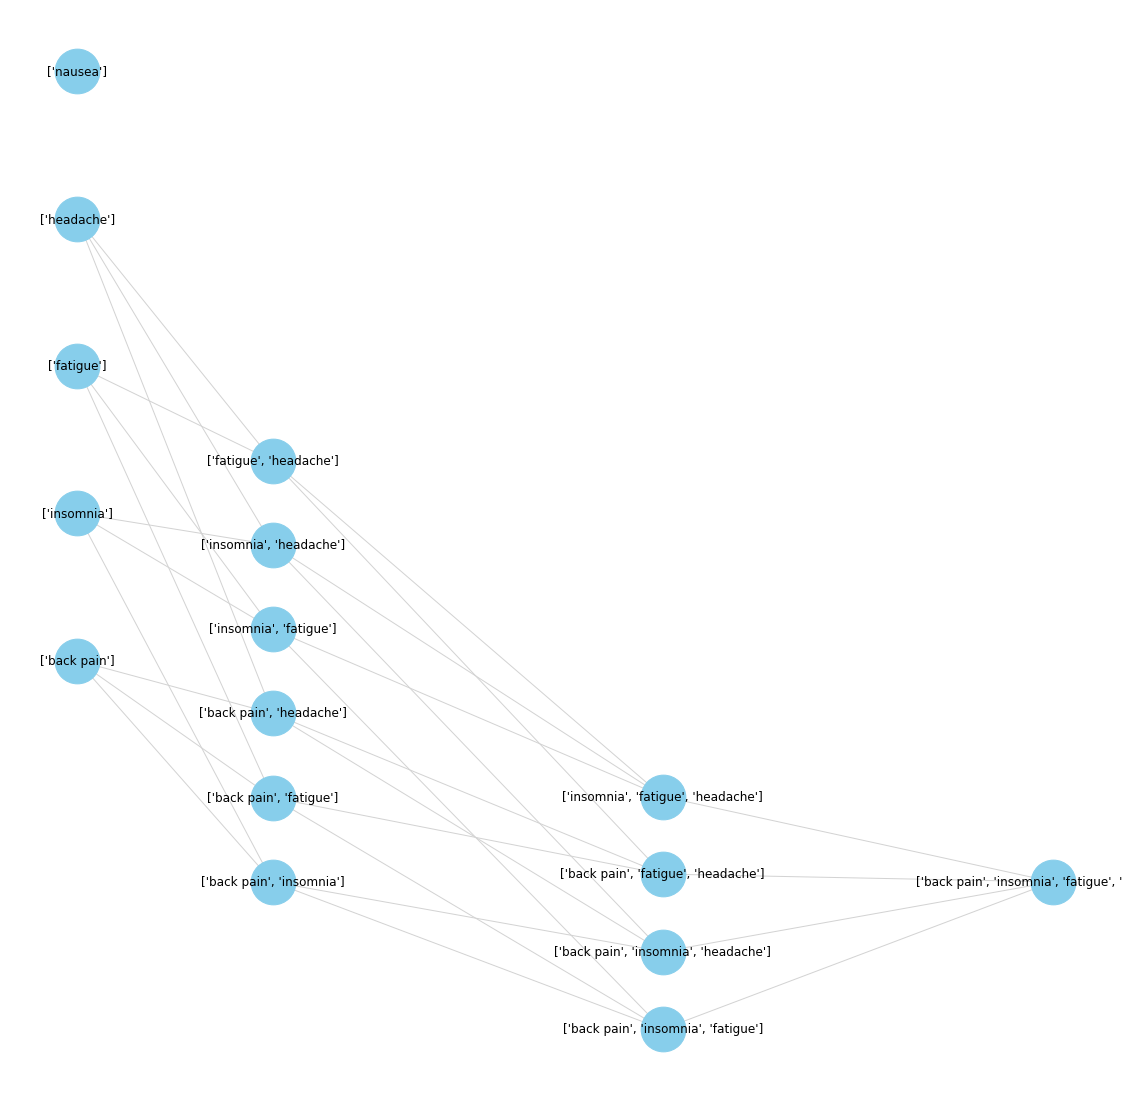

In [375]:
a1= a5=-0.5
a2= a4= -0.8
a3=-1

s1=1/(len(dict[1])-1)
s2=1.6/(len(dict[2])-1)
s3=2/(len(dict[3])-1)
s4=1.6/(len(dict[4])-1)
s5=1/(len(dict[5])-1)

        
        
        
for node in G2:
    if node in dict_str[1]:
        pos[node][0]=-0.8  #horizontal
        pos[node][1]=a1  #vertical
        a1=a1+s1
    elif node in dict_str[2]:
        pos[node][0]=-0.6  #horizontal
        pos[node][1]=a2  #vertical
        a2=a2+s2
    elif node in dict_str[3]:
        pos[node][0]=-0.2  #horizontal
        pos[node][1]=a3  #vertical
        a3=a3+s3
    elif node in dict_str[4]:
        pos[node][0]=0.2  #horizontal
        pos[node][1]=a4  #vertical
        a4=a4+s4
    elif node in dict_str[5]:
        pos[node][0]=0.6  #horizontal
        pos[node][1]=a5  #vertical  
        a5=a5+s5   
    else:
        pos[node][0]=0.8  #horizontal
        pos[node][1]=0  #vertical  


plt.subplots(figsize=(20,20))
nx.draw(G2, pos, with_labels=True,edge_color='lightgrey', node_size=2000,node_color='skyblue')
plt.show()   

In [669]:
df_con=pd.DataFrame(columns=["Antecedent","Consequent","Support(A)","Support(C)","Confidence"])
ro=0
#when k=2
k_list=list(dict_str[2])
for i in range(len(k_list)):
    if dic_count[k_list[i]] >= 15:
        df_con.at[ro,"Antecedent"]=dict[2][i][0]
        df_con.at[ro,"Consequent"]=dict[2][i][1]
        
        sp_a=str([dict[2][i][0]])
        df_con.at[ro,"Support(A)"]=dic_count[sp_a]
        
        sp_c=str(dict[2][i])
        df_con.at[ro,"Support(C)"]=dic_count[sp_c]
        
        df_con.at[ro,"Confidence"]=dic_count[sp_c]/dic_count[sp_a]
        ro=ro+1
        
        
        df_con.at[ro,"Antecedent"]=dict[2][i][1]
        df_con.at[ro,"Consequent"]=dict[2][i][0]

        sp_a=str([dict[2][i][1]])
        df_con.at[ro,"Support(A)"]=dic_count[sp_a]
        sp_c=str(dict[2][i])
        df_con.at[ro,"Support(C)"]=dic_count[sp_c]
        df_con.at[ro,"Confidence"]=dic_count[sp_c]/dic_count[sp_a]
        
        ro=ro+1

#when k>2
for k in range(3,6,1):
    k_list=list(dict_str[k])
    for i in range(len(k_list)):
        if dic_count[k_list[i]] >= 15:
            for j in range(k):

                temp=dict[k][i].copy()

                spt_c=dic_count[str(temp)]
                df_con.at[ro,"Support(C)"]=spt_c

                con=temp[j]
                df_con.at[ro,"Consequent"]=con
                temp.remove(con)
                df_con.at[ro,"Antecedent"]=temp

                df_con.at[ro,"Support(A)"]=dic_count[str(temp)]

                df_con.at[ro,"Confidence"]=spt_c/dic_count[str(temp)]
                ro=ro+1

df_con

,Antecedent,Consequent,Support(A),Support(C),Confidence
0,back pain,insomnia,26,20,0.769231
1,insomnia,back pain,22,20,0.909091
2,back pain,fatigue,26,19,0.730769
3,fatigue,back pain,19,19,1.0
4,back pain,headache,26,25,0.961538
5,headache,back pain,25,25,1.0
6,insomnia,fatigue,22,17,0.772727
7,fatigue,insomnia,19,17,0.894737
8,insomnia,headache,22,19,0.863636
9,headache,insomnia,25,19,0.76


In [547]:
df_con.to_csv("confidence.csv")

In [670]:
df_con2=df_con.iloc[16:28]
df_con2=df_con2[df_con2["Confidence"]>0.85]
df_con2.reset_index(drop=True, inplace=True)
df_con2

,Antecedent,Consequent,Support(A),Support(C),Confidence
0,"[insomnia, fatigue]",back pain,17,17,1.0
1,"[back pain, fatigue]",insomnia,19,17,0.894737
2,"[insomnia, headache]",back pain,19,19,1.0
3,"[back pain, insomnia]",headache,20,19,0.95
4,"[fatigue, headache]",back pain,18,18,1.0
5,"[back pain, fatigue]",headache,19,18,0.947368
6,"[fatigue, headache]",insomnia,18,16,0.888889
7,"[insomnia, fatigue]",headache,17,16,0.941176


In [671]:
df_con3=pd.DataFrame(columns=["Antecedent","Consequent","Support(A)","Support(C)","Confidence"])
ro=0
for i in range(len(df_con2)):
    #print(temp[0],temp[1],df_con2.at[i,"Consequent"], [temp[1],df_con2.at[i,"Consequent"]])
    for j in range(2):
        temp=df_con2.at[i,"Antecedent"].copy()
        itemset=[temp[0],temp[1],df_con2.at[i,"Consequent"]]
        count=0
        for z in range(1,len(data)+1):
            d=data.loc[z]
            if(set(itemset).issubset(set(d))):
                count=count+1  
        df_con3.at[ro,"Support(C)"]=count
              
        atc=temp[j]
        df_con3.at[ro,"Antecedent"]=atc
        df_con3.at[ro,"Support(A)"]=dic_count[str([atc])]

        temp.remove(atc)
        df_con3.at[ro,"Consequent"]=[temp[0],df_con2.at[i,"Consequent"]]
        df_con3.at[ro,"Confidence"]=df_con3.at[ro,"Support(C)"]/df_con3.at[ro,"Support(A)"]
        

        ro=ro+1
df_con3

,Antecedent,Consequent,Support(A),Support(C),Confidence
0,insomnia,"[fatigue, back pain]",22,17,0.772727
1,fatigue,"[insomnia, back pain]",19,17,0.894737
2,back pain,"[fatigue, insomnia]",26,17,0.653846
3,fatigue,"[back pain, insomnia]",19,17,0.894737
4,insomnia,"[headache, back pain]",22,19,0.863636
5,headache,"[insomnia, back pain]",25,19,0.76
6,back pain,"[insomnia, headache]",26,19,0.730769
7,insomnia,"[back pain, headache]",22,19,0.863636
8,fatigue,"[headache, back pain]",19,18,0.947368
9,headache,"[fatigue, back pain]",25,18,0.72


In [673]:
df_con4=df_con.iloc[28:]
df_con4=df_con4[df_con4["Confidence"]>0.85]
df_con4.reset_index(drop=True, inplace=True)
df_con4

,Antecedent,Consequent,Support(A),Support(C),Confidence
0,"[insomnia, fatigue, headache]",back pain,16,16,1.0
1,"[back pain, fatigue, headache]",insomnia,18,16,0.888889
2,"[back pain, insomnia, fatigue]",headache,17,16,0.941176


In [666]:
for i in range(len(df_con4)):
    temp=df_con4.at[i,"Antecedent"].copy()
    print(temp[0],temp[1],temp[2])

insomnia fatigue headache
back pain fatigue headache
back pain insomnia fatigue


In [677]:
df_con5=pd.DataFrame(columns=["Antecedent","Consequent","Support(A)","Support(C)","Confidence"])
ro=0
for i in range(len(df_con4)):
    for j in range(3):
        temp=df_con4.at[i,"Antecedent"].copy()
        itemset=[temp[0],temp[1],temp[2],df_con4.at[i,"Consequent"]]
        count=0
        for z in range(1,len(data)+1):
            d=data.loc[z]
            if(set(itemset).issubset(set(d))):
                count=count+1  
        df_con5.at[ro,"Support(C)"]=count
              
        csq=temp[j]
        df_con5.at[ro,"Consequent"]=[csq,df_con4.at[i,"Consequent"]]
      
        temp.remove(csq)

        df_con5.at[ro,"Antecedent"]=temp
        count=0
        itemset=[temp[0],temp[1]]
        for z in range(1,len(data)+1):
            d=data.loc[z]
            if(set(itemset).issubset(set(d))):
                count=count+1  
        df_con5.at[ro,"Support(A)"]=count        
        
        df_con5.at[ro,"Confidence"]=df_con5.at[ro,"Support(C)"]/df_con5.at[ro,"Support(A)"]      

        ro=ro+1
df_con5

,Antecedent,Consequent,Support(A),Support(C),Confidence
0,"[fatigue, headache]","[insomnia, back pain]",18,16,0.888889
1,"[insomnia, headache]","[fatigue, back pain]",19,16,0.842105
2,"[insomnia, fatigue]","[headache, back pain]",17,16,0.941176
3,"[fatigue, headache]","[back pain, insomnia]",18,16,0.888889
4,"[back pain, headache]","[fatigue, insomnia]",25,16,0.64
5,"[back pain, fatigue]","[headache, insomnia]",19,16,0.842105
6,"[insomnia, fatigue]","[back pain, headache]",17,16,0.941176
7,"[back pain, fatigue]","[insomnia, headache]",19,16,0.842105
8,"[back pain, insomnia]","[fatigue, headache]",20,16,0.8


In [678]:
df_con6=df_con5[df_con5["Confidence"]>0.85]
df_con6.reset_index(drop=True, inplace=True)
df_con6

,Antecedent,Consequent,Support(A),Support(C),Confidence
0,"[fatigue, headache]","[insomnia, back pain]",18,16,0.888889
1,"[insomnia, fatigue]","[headache, back pain]",17,16,0.941176
2,"[fatigue, headache]","[back pain, insomnia]",18,16,0.888889
3,"[insomnia, fatigue]","[back pain, headache]",17,16,0.941176


In [684]:
df_con7=pd.DataFrame(columns=["Antecedent","Consequent","Support(A)","Support(C)","Confidence"])
ro=0
for i in range(len(df_con6)):
    for j in range(2):
        temp=df_con6.at[i,"Antecedent"].copy()
        itemset=[temp[0],temp[1],df_con6.at[i,"Consequent"][0],df_con6.at[i,"Consequent"][1]]
        count=0
        for z in range(1,len(data)+1):
            d=data.loc[z]
            if(set(itemset).issubset(set(d))):
                count=count+1  
        df_con7.at[ro,"Support(C)"]=count
              
        csq=temp[j]
        df_con7.at[ro,"Consequent"]=[csq,df_con6.at[i,"Consequent"][0],df_con6.at[i,"Consequent"][1]]
      
        temp.remove(csq)

        df_con7.at[ro,"Antecedent"]=temp[0]
        count=0
        itemset=[temp[0]]
        for z in range(1,len(data)+1):
            d=data.loc[z]
            if(set(itemset).issubset(set(d))):
                count=count+1  
        df_con7.at[ro,"Support(A)"]=count        
        
        df_con7.at[ro,"Confidence"]=df_con7.at[ro,"Support(C)"]/df_con7.at[ro,"Support(A)"]      

        ro=ro+1
df_con7

,Antecedent,Consequent,Support(A),Support(C),Confidence
0,headache,"[fatigue, insomnia, back pain]",25,16,0.64
1,fatigue,"[headache, insomnia, back pain]",19,16,0.842105
2,fatigue,"[insomnia, headache, back pain]",19,16,0.842105
3,insomnia,"[fatigue, headache, back pain]",22,16,0.727273
4,headache,"[fatigue, back pain, insomnia]",25,16,0.64
5,fatigue,"[headache, back pain, insomnia]",19,16,0.842105
6,fatigue,"[insomnia, back pain, headache]",19,16,0.842105
7,insomnia,"[fatigue, back pain, headache]",22,16,0.727273
